<a href="https://colab.research.google.com/github/mawulimensah2/project/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
train_data = pd.read_csv("/train.csv")

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

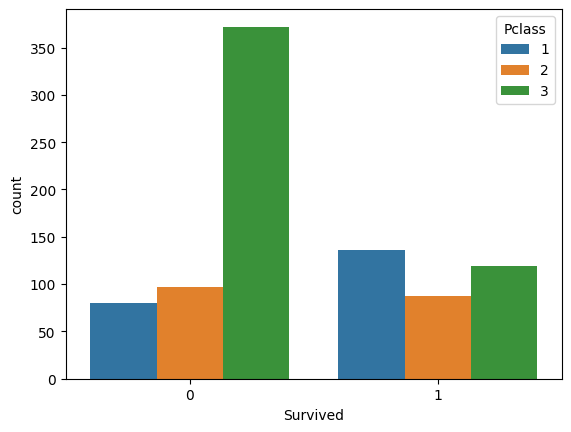

In [6]:
sns.countplot(x="Survived", data=train_data, hue="Pclass")

<ipython-input-7-24cded17e1bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

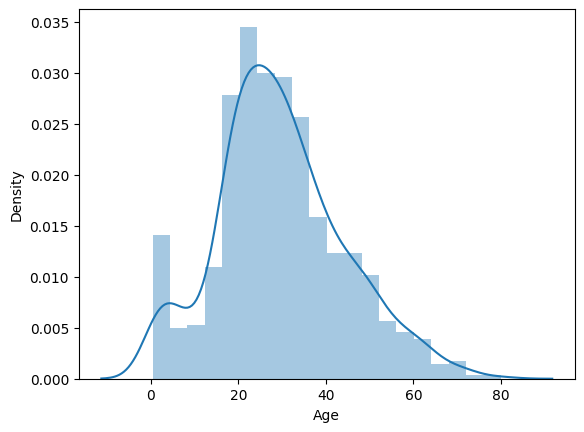

In [7]:
sns.distplot(train_data['Age'])

In [ ]:
train_data.info()
train_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

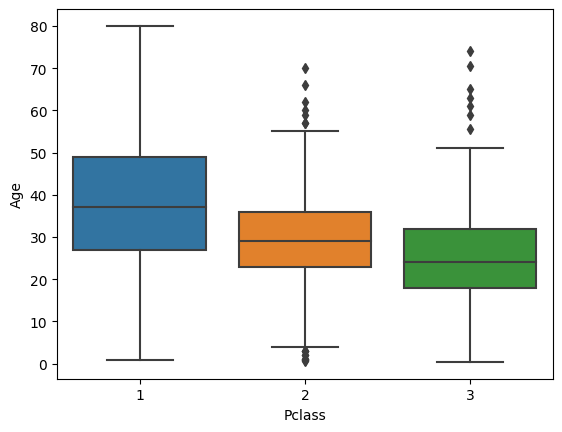

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=train_data)

In [ ]:
print()
print()
print()

38.233440860215055
29.87763005780347
25.14061971830986


In [ ]:
def fill_na_values(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return round(train_data[train_data['Pclass'] == 1]['Age'].mean())
    elif pclass == 2:
      return round(train_data[train_data['Pclass'] == 2]['Age'].mean())
    elif pclass == 3:
      return round(train_data[train_data['Pclass'] == 3]['Age'].mean())
  else:
    return age

train_data['Age'] = train_data[['Age', 'Pclass']].apply(fill_na_values, axis=1)

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_data.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
sex = pd.get_dummies(train_data['Sex'], drop_first=True)
embarked = pd.get_dummies(train_data['Embarked'], drop_first=True)

In [ ]:
train_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [ ]:
train_data = pd.concat([train_data, sex, embarked], axis=1)

In [ ]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

predictions = svm.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.98      0.82        48
           1       0.96      0.54      0.69        41

    accuracy                           0.78        89
   macro avg       0.83      0.76      0.76        89
weighted avg       0.82      0.78      0.76        89

[[47  1]
 [19 22]]


In [ ]:
param_grid = {'C': [0, 0.5, 1, 10, 50, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_para

In [ ]:
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        48
           1       0.88      0.73      0.80        41

    accuracy                           0.83        89
   macro avg       0.84      0.82      0.83        89
weighted avg       0.84      0.83      0.83        89

[[44  4]
 [11 30]]


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

print(classification_report(y_test, lr_predictions))
print(confusion_matrix(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        48
           1       0.77      0.66      0.71        41

    accuracy                           0.75        89
   macro avg       0.76      0.75      0.75        89
weighted avg       0.75      0.75      0.75        89

[[40  8]
 [14 27]]


In [ ]:
error_list = []

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
#error_list.append(np.mean(knn_predictions != y_test))

print(classification_report(y_test, knn_predictions))
print(confusion_matrix(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        48
           1       0.85      0.68      0.76        41

    accuracy                           0.80        89
   macro avg       0.81      0.79      0.79        89
weighted avg       0.81      0.80      0.79        89

[[43  5]
 [13 28]]


0.19101123595505617

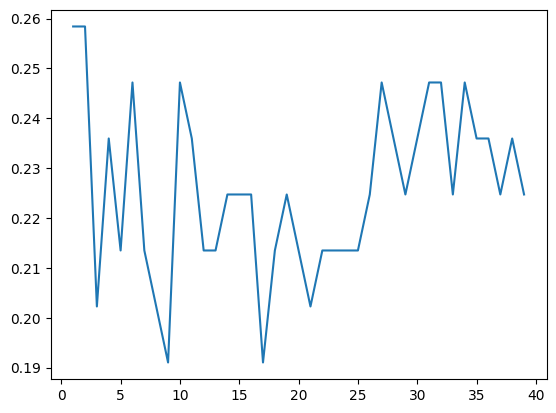

In [ ]:
plt.plot(range(1,40), error_list)
np.argmin(error_list)
error_list[8]

In [ ]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=200)

In [ ]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

dt_predictions = dt.predict(X_test)
rfc_predictions = rf.predict(X_test)


print(classification_report(y_test, dt_predictions))
print(confusion_matrix(y_test, dt_predictions))

print(classification_report(y_test, rfc_predictions))
print(confusion_matrix(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        48
           1       0.74      0.68      0.71        41

    accuracy                           0.74        89
   macro avg       0.74      0.74      0.74        89
weighted avg       0.74      0.74      0.74        89

[[38 10]
 [13 28]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        48
           1       0.77      0.59      0.67        41

    accuracy                           0.73        89
   macro avg       0.74      0.72      0.72        89
weighted avg       0.74      0.73      0.72        89

[[41  7]
 [17 24]]
